# UAV Detection and Tracking

Multi-Object Tracking (MOT) is a core visual ability that humans poses to perform kinetic tasks and coordinate other tasks. The AI community has recognized the importance of MOT via a series of [competitions](https://motchallenge.net). 

In this assignment, the object class is `drone` and the ability to track this object  will be demonstrated using [Kalman Filters](https://en.wikipedia.org/wiki/Kalman_filter). The assignment will give you the opportunity to apply probabilistic reasoning in the physical security application space. 

## Task 1: Setup your development environment and store the test videos locally (10 points)

In [5]:
from pytube import YouTube

def Download(link):
    youtubeObject = YouTube(link)
    youtubeObject = youtubeObject.streams.get_highest_resolution()
    try:
        youtubeObject.download()
    except:
        print("An error has occurred")
    print("Download is completed successfully")

In [7]:
link_1 = "https://www.youtube.com/watch?v=DhmZ6W1UAv4"
Download(link_1)
link_2 = "https://www.youtube.com/watch?v=YrydHPwRelI"
Download(link_2)

Download is completed successfully
Download is completed successfully


## Task 1: Drone Object Detection (40 points)

You need to research can use any dataset that can be used to detect the class `drone` such as the drones used for the test videos. Please be careful to distinguish between the datasets that detect objects *from* drones to datasets that detect *the* drones. Your object detector must use a deep learning model but you can use an existing object detector model architecture. 

Split the videos into frames and use each frame to present the drone detections you got. Store all images that you had detections in a folder called `detections`. Write your code in such a way that a number of videos can be processed from a directory and not just these two.


## Split the videos into frames

In [16]:
!pip3 install opencv-python-headless==4.5.3.56

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.1/37.1 MB 8.0 MB/s eta 0:00:00:00:0100:01


In [81]:
import cv2
 
def split_video_into_frames(video_path, output_folder):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    # Get information about the video
    fps = int(video_capture.get(cv2.CAP_PROP_FPS))
    frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

    # Loop through each frame and save it as an image
    for frame_number in range(frame_count):
        ret, frame = video_capture.read()
        if not ret:
            break
        # Save the frame as an image
        else:
            if (frame_number+1)<10:
                frame_filename = f"{output_folder}/frame_000{frame_number + 1}.jpg"
                cv2.imwrite(frame_filename, frame)
            elif (frame_number+1)>=10 and (frame_number+1)<100:
                frame_filename = f"{output_folder}/frame_00{frame_number + 1}.jpg"
                cv2.imwrite(frame_filename, frame)
            elif (frame_number+1)>=100 and (frame_number+1)<1000:
                frame_filename = f"{output_folder}/frame_0{frame_number + 1}.jpg"
                cv2.imwrite(frame_filename, frame)
            else:
                frame_filename = f"{output_folder}/frame_{frame_number + 1}.jpg"
                cv2.imwrite(frame_filename, frame)

    # Release the video capture object
    video_capture.release()

In [ ]:
!mkdir Drone_Tracking_1
!mkdir Drone_Tracking_2

In [82]:
if __name__ == "__main__":
    video_path = "Drone Tracking 1.mp4"
    output_folder = "Drone_Tracking_1"
    split_video_into_frames(video_path, output_folder)

In [24]:
if __name__ == "__main__":
    video_path = "Drone Tracking 2.mp4"
    output_folder = "Drone_Tracking_2"
    split_video_into_frames(video_path, output_folder)

In [2]:
!pip3 install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 13.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 19.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 26.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 22.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip3 install opencv-python-headless==4.5.3.56

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.1/37.1 MB 3.8 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
from PIL import Image
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.9.18 torch-2.1.0+cu121 CPU (Intel Core(TM) i5-8259U 2.30GHz)
Setup complete ✅ (8 CPUs, 7.8 GB RAM, 36.0/117.0 GB disk)


## Get the dataset

Here I use the dataset "Drone Dataset (UAV)" and download it from "https://www.kaggle.com/datasets/dasmehdixtr/drone-dataset-uav/data". Then, we can get a folder called "archive" which including two folders "dataset_xml_format" and "drone_dataset_yolo".

In [28]:
!mkdir datasets
!mkdir datasets/train
!mkdir datasets/valid
!mkdir datasets/test

train_path='datasets/train/'
valid_path='datasets/valid/'
test_path='datasets/test/'

In [52]:
ano_paths=[]
for dirname, _, filenames in os.walk('archive/drone_dataset_yolo/dataset_txt'):
    for filename in filenames:
        if filename[-4:]=='.txt':
            ano_paths+=[(os.path.join(dirname, filename))]
        
n=1000#len(ano_paths) 
print(n)
N=list(range(n))
random.shuffle(N)

train_ratio = 0.7
valid_ratio = 0.2
test_ratio = 0.1

train_size = int(train_ratio*n)
valid_size = int(valid_ratio*n)

train_i = N[:train_size]
valid_i = N[train_size:train_size+valid_size]
test_i = N[train_size+valid_size:]

print(train_i)
print(valid_i)
print(test_i)

1000
[12, 283, 669, 84, 847, 150, 626, 694, 405, 510, 558, 890, 153, 24, 178, 485, 937, 334, 807, 557, 768, 830, 920, 21, 309, 970, 492, 797, 906, 836, 901, 333, 93, 571, 303, 434, 940, 450, 771, 916, 997, 584, 871, 810, 158, 679, 304, 52, 117, 469, 764, 19, 231, 250, 969, 360, 659, 327, 118, 727, 564, 18, 230, 978, 740, 820, 218, 703, 627, 346, 256, 222, 416, 556, 45, 176, 640, 785, 801, 152, 277, 823, 406, 495, 135, 512, 698, 900, 272, 127, 412, 195, 967, 543, 620, 200, 843, 527, 775, 74, 22, 292, 328, 107, 748, 781, 164, 65, 474, 572, 418, 300, 728, 297, 723, 914, 369, 580, 408, 138, 373, 201, 190, 958, 752, 147, 707, 291, 865, 289, 214, 368, 600, 494, 518, 116, 855, 786, 142, 239, 0, 743, 9, 229, 444, 63, 731, 157, 414, 581, 463, 332, 670, 83, 146, 951, 318, 123, 38, 554, 275, 335, 962, 295, 641, 56, 762, 60, 658, 794, 262, 568, 593, 700, 757, 228, 473, 548, 617, 207, 180, 725, 742, 10, 173, 717, 661, 793, 267, 938, 846, 209, 857, 783, 484, 98, 895, 220, 623, 266, 366, 338, 233, 24

In [53]:
print(len(train_i))
print(len(ano_paths))

700
1359


In [54]:
for i in train_i:
    ano_path=ano_paths[i]
    img_path=os.path.join('archive/drone_dataset_yolo/dataset_txt',
                          ano_path.split('/')[-1][0:-4]+'.jpg')
    try:
        !cp {ano_path} {train_path}
        !cp {img_path} {train_path}
    except:
        continue
print(len(os.listdir(train_path)))

1400


In [55]:
for i in test_i:
    ano_path=ano_paths[i]
    img_path=os.path.join('archive/drone_dataset_yolo/dataset_txt',
                          ano_path.split('/')[-1][0:-4]+'.jpg')
    try:
        !cp {ano_path} {test_path}
        !cp {img_path} {test_path}
    except:
        continue
print(len(os.listdir(test_path)))   

200


In [56]:
for i in valid_i:
    ano_path=ano_paths[i]
    img_path=os.path.join('archive/drone_dataset_yolo/dataset_txt',
                          ano_path.split('/')[-1][0:-4]+'.jpg')
    try:
        !cp {ano_path} {valid_path}
        !cp {img_path} {valid_path}
    except:
        continue
print(len(os.listdir(valid_path)))

400


In [57]:
import yaml

data_yaml = dict(
    train ='train',
    val ='valid',
    test='test',
    nc =1,
    names =['drone']
)

with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)
    
%cat data.yaml

{names: [drone], nc: 1, test: test, train: train, val: valid}


In [41]:
names =['drone']
M=list(range(len(names)))
class_map=dict(zip(M,names))

## Model

Here I use the  YOLOv8 model.

In [7]:
model = YOLO("yolov8x.pt") 

In [1]:
!yolo task=detect mode=train model=yolov8x.pt data=data.yaml epochs=6 imgsz=240

New https://pypi.org/project/ultralytics/8.0.210 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.208 🚀 Python-3.9.18 torch-2.1.0+cu121 CPU (Intel Core(TM) i5-8259U 2.30GHz)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=data.yaml, epochs=6, patience=50, batch=16, imgsz=240, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_n

## Detect the video frame

### For video 1

In [83]:
best_path0='runs/detect/train/weights/best.pt'

# For video 1
source0='Drone_Tracking_1'

In [84]:
ppaths=[]
for dirname, _, filenames in os.walk(source0):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            ppaths+=[(os.path.join(dirname, filename))]
ppaths=sorted(ppaths)

In [99]:
print(ppaths[0])

Drone_Tracking_1/frame_0001.jpg


In [85]:
model2 = YOLO(best_path0)

In [ ]:
!yolo task=detect mode=predict model={best_path0} conf=0.2 source={source0}

Ultralytics YOLOv8.0.208 🚀 Python-3.9.18 torch-2.1.0+cu121 CPU (Intel Core(TM) i5-8259U 2.30GHz)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs

image 1/4941 /app/Assignment-3/Drone_Tracking_1/frame_1.jpg: 160x256 1 drone, 3101.4ms
image 2/4941 /app/Assignment-3/Drone_Tracking_1/frame_10.jpg: 160x256 1 drone, 779.6ms
image 3/4941 /app/Assignment-3/Drone_Tracking_1/frame_100.jpg: 160x256 1 drone, 502.4ms
image 4/4941 /app/Assignment-3/Drone_Tracking_1/frame_1000.jpg: 160x256 2 drones, 173.2ms
image 5/4941 /app/Assignment-3/Drone_Tracking_1/frame_1001.jpg: 160x256 2 drones, 314.2ms
image 6/4941 /app/Assignment-3/Drone_Tracking_1/frame_1002.jpg: 160x256 1 drone, 160.3ms
image 7/4941 /app/Assignment-3/Drone_Tracking_1/frame_1003.jpg: 160x256 1 drone, 643.7ms
image 8/4941 /app/Assignment-3/Drone_Tracking_1/frame_1004.jpg: 160x256 2 drones, 397.0ms
image 9/4941 /app/Assignment-3/Drone_Tracking_1/frame_1005.jpg: 160x256 2 drones, 542.5ms
image 10/4941 /app/A

In [90]:
results = model2.predict(source0,conf=0.2)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/3000 /app/Assignment-3/Drone_Tracking_1/frame_0001.jpg: 160x256 1 drone, 2489.2ms
image 2/3000 /app/Assignment-3/Drone_Tracking_1/frame_0002.jpg: 160x256 1 drone, 839.3ms
image 3/3000 /app/Assignment-3/Drone_Tracking_1/frame_0003.jpg: 160x256 1 drone, 1430.8ms
image 4/3000 /app/Assignment-3/Drone_Tracking_1/frame_0004.jpg: 160x256 1 drone, 770.2ms
image 5/3000 /app/Assignment-3/Drone_Tracking_1/frame_0005.jpg: 160x256 1 drone, 284.7ms
image 6/3

In [91]:
print(len(results))

3000


In [92]:
print((results[0].boxes.cls))

tensor([0.])


In [93]:
print((results[0].boxes.numpy()))

ultralytics.engine.results.Boxes object with attributes:

cls: array([          0], dtype=float32)
conf: array([    0.54522], dtype=float32)
data: array([[     546.95,      102.05,      660.61,      169.39,     0.54522,           0]], dtype=float32)
id: None
is_track: False
orig_shape: (720, 1280)
shape: (1, 6)
xywh: array([[     603.78,      135.72,      113.66,      67.337]], dtype=float32)
xywhn: array([[     0.4717,      0.1885,    0.088798,    0.093523]], dtype=float32)
xyxy: array([[     546.95,      102.05,      660.61,      169.39]], dtype=float32)
xyxyn: array([[     0.4273,     0.14174,      0.5161,     0.23526]], dtype=float32)


In [ ]:
!mkdir detections

In [35]:
# Store the images with detections in folder detections.

def copy_image(source_path, destination_folder):
    # Extract the filename from the source path
    filename = os.path.basename(source_path)

    # Construct the destination path
    destination_path = os.path.join(destination_folder, filename)

    # Copy the image to the destination folder
    shutil.copy(source_path, destination_path)

In [39]:
import torch

if __name__ == "__main__":
    
    destination_folder = "detections"

    for i in range(len(results)):
        if torch.numel(results[i].boxes.cls) != 0:
            frame_name = (results[i].path.split("/app/Assignment-3/Drone_Tracking_1/")[1])
            image_path = "/app/Assignment-3/runs/detect/predict/" + frame_name
            copy_image(image_path, destination_folder)

In [98]:
frame_name = (results[0].path.split("/app/Assignment-3/Drone_Tracking_1/")[1])
print(frame_name)
image_path = "/app/Assignment-3/runs/detect/predict/" + frame_name
print(image_path)

frame_0001.jpg
/app/Assignment-3/runs/detect/predict/frame_0001.jpg


In [94]:
PBOX=pd.DataFrame(columns=range(6))
for i in range(len(results)):
    arri=pd.DataFrame(results[i].boxes.data.cpu().numpy()).astype(float)
    path=ppaths[i]
    file=path.split('/')[-1]
    arri=arri.assign(file=file)
    arri=arri.assign(i=i)
    PBOX=pd.concat([PBOX,arri],axis=0)
PBOX.columns=['x','y','x2','y2','confidence','class','file','i']
display(PBOX)

/tmp/ipykernel_5110/2361230193.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PBOX=pd.concat([PBOX,arri],axis=0)


,x,y,x2,y2,confidence,class,file,i
0,546.947876,102.051315,660.609436,169.387894,0.545216,0.0,frame_0001.jpg,0.0
0,546.947876,102.051849,660.606934,169.387665,0.545194,0.0,frame_0002.jpg,1.0
0,546.947632,102.051849,660.606384,169.387848,0.545203,0.0,frame_0003.jpg,2.0
0,546.947632,102.051849,660.606384,169.387848,0.545203,0.0,frame_0004.jpg,3.0
0,546.947876,102.051315,660.609436,169.387894,0.545216,0.0,frame_0005.jpg,4.0
...,...,...,...,...,...,...,...,...
0,596.944946,0.000000,688.582092,54.168537,0.283854,0.0,frame_2745.jpg,2744.0
0,598.742310,0.000000,693.102356,55.529831,0.287481,0.0,frame_2746.jpg,2745.0
0,598.174072,0.000000,694.147034,55.745819,0.315412,0.0,frame_2747.jpg,2746.0
0,597.728699,0.000000,710.660400,56.904819,0.452329,0.0,frame_2750.jpg,2749.0


In [95]:
PBOX['class']=PBOX['class'].apply(lambda x: class_map[int(x)])
PBOX=PBOX.reset_index(drop=True)
display(PBOX)
display(PBOX['class'].value_counts())

,x,y,x2,y2,confidence,class,file,i
0,546.947876,102.051315,660.609436,169.387894,0.545216,drone,frame_0001.jpg,0.0
1,546.947876,102.051849,660.606934,169.387665,0.545194,drone,frame_0002.jpg,1.0
2,546.947632,102.051849,660.606384,169.387848,0.545203,drone,frame_0003.jpg,2.0
3,546.947632,102.051849,660.606384,169.387848,0.545203,drone,frame_0004.jpg,3.0
4,546.947876,102.051315,660.609436,169.387894,0.545216,drone,frame_0005.jpg,4.0
...,...,...,...,...,...,...,...,...
1691,596.944946,0.000000,688.582092,54.168537,0.283854,drone,frame_2745.jpg,2744.0
1692,598.742310,0.000000,693.102356,55.529831,0.287481,drone,frame_2746.jpg,2745.0
1693,598.174072,0.000000,694.147034,55.745819,0.315412,drone,frame_2747.jpg,2746.0
1694,597.728699,0.000000,710.660400,56.904819,0.452329,drone,frame_2750.jpg,2749.0


class
drone    1696
Name: count, dtype: int64

frame_0001.jpg


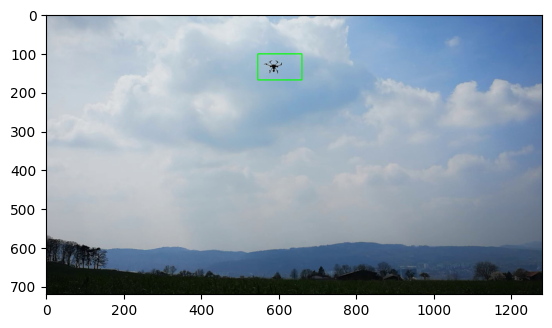

In [96]:
# Example of drawing the bounding box

ipath = "/app/Assignment-3/Drone_Tracking_1/frame_0001.jpg"
image_test = cv2.imread(ipath)
H,W=image_test.shape[0],image_test.shape[1]
file=ipath.split('/')[-1]
print(file)
if PBOX[PBOX['file']==file] is not None:
    box=PBOX[PBOX['file']==file]
    box=box.reset_index(drop=True)
    #display(box)

    for i in range(len(box)):
        label=box.loc[i,'class']
        x=int(box.loc[i,'x'])
        y=int(box.loc[i,'y'])
        x2=int(box.loc[i,'x2']) 
        y2=int(box.loc[i,'y2'])
        #print(label,x,y,x2,y2)
        #cv2.putText(image, f'{label}', (x, int(y-4)), 
        #            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0),2)
        cv2.rectangle(image_test,(x,y),(x2,y2),(0,255,0),2) #green

        output_filename = file
        
        plt.imshow(cv2.cvtColor(image_test,cv2.COLOR_BGR2RGB))
        plt.savefig(os.path.join("Bounding Box", output_filename))
        plt.show()

In [45]:
def draw_box2(n0):
    
    ipath=ppaths[n0]
    image=cv2.imread(ipath)
    H,W=image.shape[0],image.shape[1]
    file=ipath.split('/')[-1]
    
    if PBOX[PBOX['file']==file] is not None:
        box=PBOX[PBOX['file']==file]
        box=box.reset_index(drop=True)
        #display(box)

        for i in range(len(box)):
            label=box.loc[i,'class']
            x=int(box.loc[i,'x'])
            y=int(box.loc[i,'y'])
            x2=int(box.loc[i,'x2']) 
            y2=int(box.loc[i,'y2'])
            #print(label,x,y,x2,y2)
            #cv2.putText(image, f'{label}', (x, int(y-4)), 
            #            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0),2)
            cv2.rectangle(image,(x,y),(x2,y2),(0,255,0),2) #green
    
    #plt.imshow(image)
    #plt.show()   
    
    return image

# Task 2: Kalman Filter (50 points)

In [97]:
!pip3 install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110473 sha256=defaf3d8157fbb7b74c49d1b8fc7748ecba9170e5b789503fee1993457a980bf
  Stored in directory: /root/.cache/pip/wheels/53/e6/de/a09ea01e923aaf88b9f8c7c44329e857b2c1a31901167e55e6
Successfully built filterpy

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [106]:
from filterpy.kalman import KalmanFilter

def initialize_kalman_filter():
    kf = KalmanFilter(dim_x=4, dim_z=2)

    # Initial state
    kf.x = np.array([0, 0, 0, 0])

    # State transition matrix
    kf.F = np.array([[1, 0, 1, 0],
                     [0, 1, 0, 1],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])

    # Measurement matrix
    kf.H = np.array([[1, 0, 0, 0],
                     [0, 1, 0, 0]])

    # Process noise covariance matrix
    kf.Q = np.array([[1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])

    # Measurement noise covariance matrix
    kf.R = np.array([[10, 0],
                     [0, 10]])

    return kf


In [162]:
import numpy as np

drone_detected = []
predicted_points = []

for i in range(len(results)):
    ipath=ppaths[i]
    image=cv2.imread(ipath)
    H,W=image.shape[0],image.shape[1]
    file=ipath.split('/')[-1]
    
    if PBOX[PBOX['file']==file] is not None:
        box=PBOX[PBOX['file']==file]
        box=box.reset_index(drop=True)
        #display(box)

        for i in range(len(box)):
            label=box.loc[i,'class']
            x=int(box.loc[i,'x'])
            y=int(box.loc[i,'y'])
            x2=int(box.loc[i,'x2']) 
            y2=int(box.loc[i,'y2'])
            #print(label,x,y,x2,y2)
            #cv2.putText(image, f'{label}', (x, int(y-4)), 
            #            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0),2)

            #Here we get the center point
            cx = int((x + x2) / 2)
            cy = int((y + y2) / 2)
            drone_detected.append([cx,cy])

# Initialize Kalman Filter
kf = initialize_kalman_filter()

# Kalman Filter update loop
filtered_states = []
for drone in drone_detected:
    # Prediction
    kf.predict()

    # Update with measurement
    kf.update(drone)

    # Save the estimated state
    filtered_states.append(kf.x[:2])

# Convert to NumPy array for easy plotting
filtered_states = np.array(filtered_states)

print(drone_detected[0])
print(filtered_states[0])

[603, 135]
[     139.15      31.154]


In [163]:
drone_detected = np.array(drone_detected)

We can see for frame_1001, the prediction is very good.

In [164]:
print(drone_detected[1000])
print(filtered_states[1000])

[593 138]
[      593.1      138.22]


In [165]:
print(type(drone_detected))
print(type(filtered_states))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


frame_0900.jpg


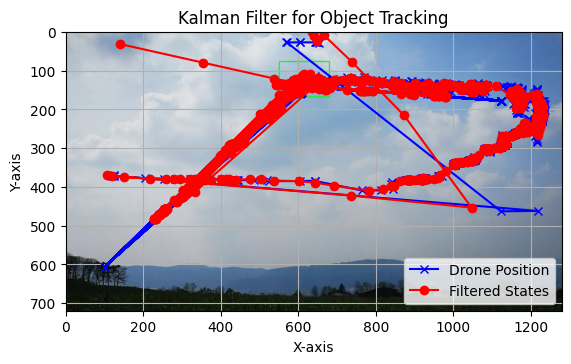

In [173]:
ipath = "/app/Assignment-3/Drone_Tracking_1/frame_0900.jpg"
image_test = cv2.imread(ipath)
H,W=image_test.shape[0],image_test.shape[1]
file=ipath.split('/')[-1]
print(file)
if PBOX[PBOX['file']==file] is not None:
    box=PBOX[PBOX['file']==file]
    box=box.reset_index(drop=True)
    #display(box)

    for i in range(len(box)):
        label=box.loc[i,'class']
        x=int(box.loc[i,'x'])
        y=int(box.loc[i,'y'])
        x2=int(box.loc[i,'x2']) 
        y2=int(box.loc[i,'y2'])
        #print(label,x,y,x2,y2)
        #cv2.putText(image, f'{label}', (x, int(y-4)), 
        #            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0),2)
        cv2.rectangle(image_test,(x,y),(x2,y2),(0,255,0),2) #green


plt.figure()
plt.plot(drone_detected[:, 0], drone_detected[:, 1], label='Drone Position', marker='x', color='blue')
plt.plot(filtered_states[:, 0], filtered_states[:, 1], label='Filtered States', marker='o', color='red')
plt.imshow(cv2.cvtColor(image_test,cv2.COLOR_BGR2RGB))
plt.legend()
plt.title('Kalman Filter for Object Tracking')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

### All the points on the left part of the image is because on some of the frames, the model detected the trees on the mountain as drone, causing problems.

frame_1400.jpg


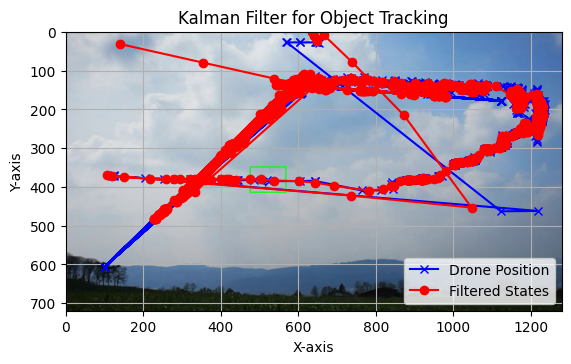

In [174]:
ipath = "/app/Assignment-3/Drone_Tracking_1/frame_1400.jpg"
image_test = cv2.imread(ipath)
H,W=image_test.shape[0],image_test.shape[1]
file=ipath.split('/')[-1]
print(file)
if PBOX[PBOX['file']==file] is not None:
    box=PBOX[PBOX['file']==file]
    box=box.reset_index(drop=True)
    #display(box)

    for i in range(len(box)):
        label=box.loc[i,'class']
        x=int(box.loc[i,'x'])
        y=int(box.loc[i,'y'])
        x2=int(box.loc[i,'x2']) 
        y2=int(box.loc[i,'y2'])
        #print(label,x,y,x2,y2)
        #cv2.putText(image, f'{label}', (x, int(y-4)), 
        #            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0),2)
        cv2.rectangle(image_test,(x,y),(x2,y2),(0,255,0),2) #green


plt.figure()
plt.plot(drone_detected[:, 0], drone_detected[:, 1], label='Drone Position', marker='x', color='blue')
plt.plot(filtered_states[:, 0], filtered_states[:, 1], label='Filtered States', marker='o', color='red')
plt.imshow(cv2.cvtColor(image_test,cv2.COLOR_BGR2RGB))
plt.legend()
plt.title('Kalman Filter for Object Tracking')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()